<a href="https://colab.research.google.com/github/ckteja/Animal-Intrusion-Detection/blob/main/AIDsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/person.zip

Archive:  /content/gdrive/MyDrive/person.zip
  inflating: Dataset/Dataset/test/Person/images/034646295ccd5f30.jpg  
  inflating: Dataset/Dataset/test/Person/images/039d5b2842e0252e.jpg  
  inflating: Dataset/Dataset/test/Person/images/05f4784eeafcaf3d.jpg  
  inflating: Dataset/Dataset/test/Person/images/0b09f246341ee9e7.jpg  
  inflating: Dataset/Dataset/test/Person/images/0b49047138f2b4c9.jpg  
  inflating: Dataset/Dataset/test/Person/images/0def43d0bd4744e3.jpg  
  inflating: Dataset/Dataset/test/Person/images/0ec39cae3f8165dc.jpg  
  inflating: Dataset/Dataset/test/Person/images/0efa69f6969becce.jpg  
  inflating: Dataset/Dataset/test/Person/images/115ab620a30a259c.jpg  
  inflating: Dataset/Dataset/test/Person/images/12330b102ca4fa94.jpg  
  inflating: Dataset/Dataset/test/Person/images/134e7aae3e2561c9.jpg  
  inflating: Dataset/Dataset/test/Person/images/1671c1c284b4cc2e.jpg  
  inflating: Dataset/Dataset/test/Person/images/16bb798e98391b22.jpg  
  inflating: Dataset/Dataset/tes

In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=c1d0d0de94eb6a8bf3eda81c6bc766564d958ea3f6d70be5815554a11fab21e0
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/78.2 GB disk)


In [ ]:
# Train YOLOv5s
!python train.py --img 415 --batch 31 --epochs 101 --data coco128.yaml --weights yolov5s.pt --cache

2024-03-22 18:20:27.168835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 18:20:27.168882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 18:20:27.170354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=101, batch_size=31, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, op

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 196 --conf 0.25 --source /content/pe1.jpg

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/pe1.jpg, data=data/coco128.yaml, imgsz=[196, 196], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [196, 196] must be multiple of max stride 32, updating to [224, 224]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/pe1.jpg: 160x224 8 persons, 51.3ms
Speed: 0.4ms pre-process, 51.3ms inference, 560.6ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/detect/exp


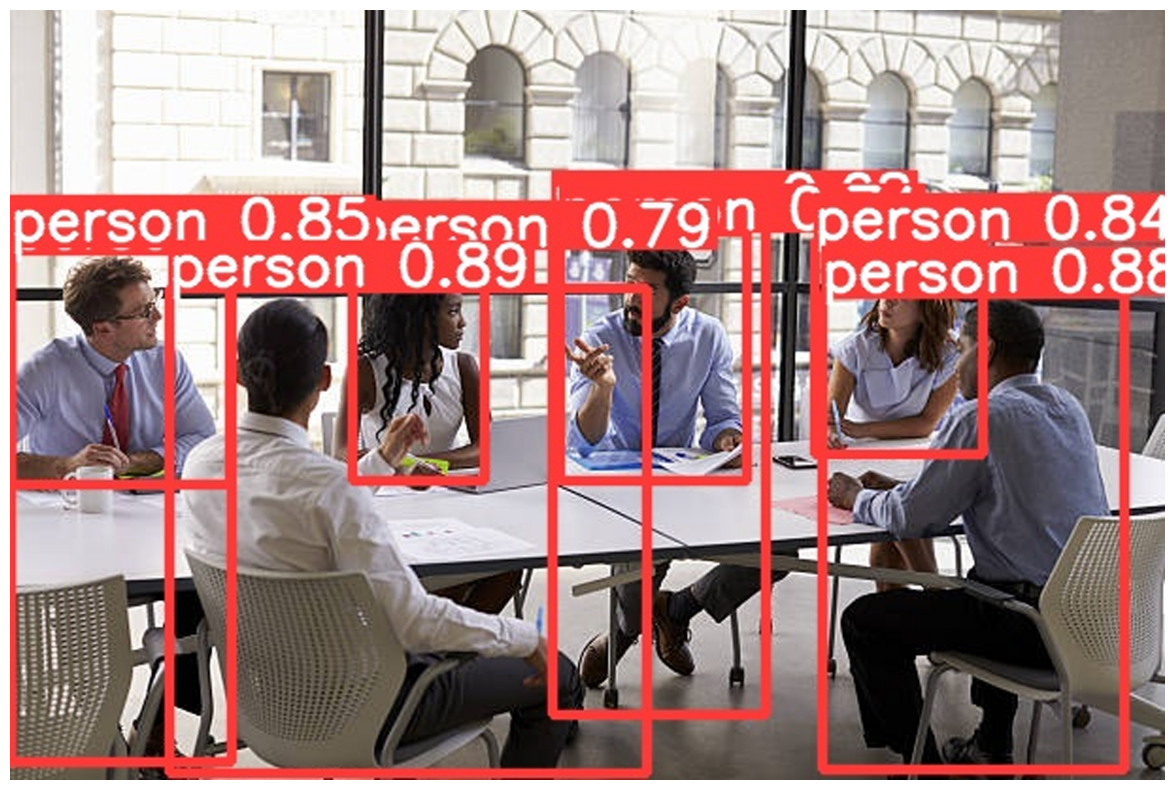

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("runs/detect/exp/pe1.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()